In [5]:
##Import Libraries##
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
import pandas as pd
from scipy.interpolate import interp1d

In [5]:
############## Calculate density at each temperature using the thermal expansion formula #################

rho_0 = 5080  # Density of Alloy at 20°C (kg/m³)
T_0 = 20  # Reference temperature (°C)
alpha = -30e-6  # Linear thermal expansion coefficient (1/°C)
temperatures = np.array([21, 25, 49, 50, 51, 52, 90]) # Temperature values

# Calculate density at each temperature using the thermal expansion formula
SS_den = rho_0 / (1 + alpha * (temperatures - T_0)) # ρ' = ρ/(1+αΔΤ) equation for density at temperature T
Water_den = np.array([997.9731, 997.043, 988.4527, 988.0165, 987.546, 987.0755, 961.89]) # values of water dens
Ratio = SS_den / Water_den # the Ratio is the densities variation

# Create a DataFrame for better visualization
df = pd.DataFrame({'Temp (°C)': temperatures, 'ALLVAR_Den (kg/m³)': SS_den, 'Water_Den (kg/m³)': Water_den, 'Density Ratio':Ratio})
print(df)

   Temp (°C)  ALLVAR_Den (kg/m³)  Water_Den (kg/m³)  Density Ratio
0         21         5080.152405           997.9731       5.090470
1         25         5080.762114           997.0430       5.095830
2         49         5084.423448           988.4527       5.143821
3         50         5084.576119           988.0165       5.146246
4         51         5084.728798           987.5460       5.148853
5         52         5084.881486           987.0755       5.151462
6         90         5090.690450           961.8900       5.292383


For x = 2 mm, y = 0.0695 mm
For x = 4 mm, y = 0.1390 mm
For x = 10 mm, y = 0.3474 mm
For x = 20 mm, y = 0.6949 mm
For x = 28.782 mm, y = 1.0000 mm
For x = 40 mm, y = 1.3898 mm
For x = 50 mm, y = 1.7372 mm
For x = 60 mm, y = 2.0847 mm


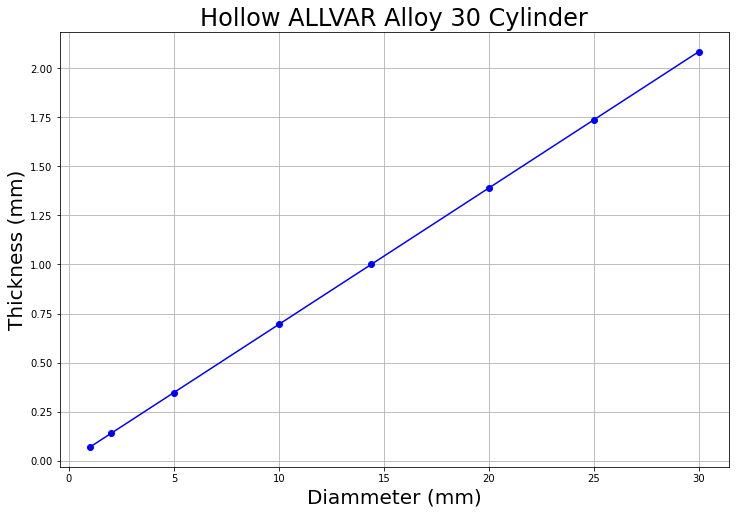

In [12]:
############################# Hollow ALLVAR Alloy 30 Cylinder #########################
R = 5.146246
def cubic_equation(y, x):
    return R * y * (3 * x**2 - 3 * x * y + y**2) - x**3

# Function to compute y for specific x values
def compute_y_for_x(x_values):
    y_values = []
    for x in x_values:
        roots = fsolve(cubic_equation, x0=[0.1], args=(x))
        real_roots = roots[np.isreal(roots)].real
        y_values.append(real_roots[0])
    return y_values

# Specific x values to evaluate
specific_x_values = [1, 2, 5, 10, 14.391, 20, 25, 30]

# Compute corresponding y values
y_results = compute_y_for_x(specific_x_values)

# Print the results
for x, y in zip(specific_x_values, y_results):
    print(f"For x = {x*2} mm, y = {y:.4f} mm")

# Plotting the correct values
plt.figure(figsize=(12, 8))
plt.plot(specific_x_values, y_results, marker='o', linestyle='-', color='blue', label='Computed y(x)')

plt.title("Hollow ALLVAR Alloy 30 Cylinder", fontsize=24)
plt.xlabel("Diammeter (mm)", fontsize=20)
plt.ylabel("Thickness (mm)", fontsize=20)
plt.grid(True)
plt.show()

In [13]:
########################## Hollow Cylinder Mass ####################################

rho = 5080         # density ALLVAR Alloy 30  at 20C
x = 0.014391          # Diameter in meters
t = 0.001        # Thickness in meters
pi = 3.141592      # π

# Calculate the mass
m = rho*2*pi*t*(3*x**2-3*x*t+t**2)*1000

print(f"mass has to be: {m:.6f} grams")

mass has to be: 18.484993 grams


In [14]:
######################################### Maximum density ###################################
rho = 5080     # density
x_min = 0.014396           # max radius in meters
t = 1*(10**-3)         # max thickness in meters
pi = 3.141592  
T0 = 20
T  = 50

m_min = rho*2*pi*t*(3*x_min**2-3*x_min*t+t**2)
alp = 16*(10**-6)
DT = T - T0
ρ_max = m_min / (2*pi*(x_min**3)*(1+alp*DT)**3)
print(f" max mass is: {m_min*1000:.6f} grams")
print(f" min density is: {ρ_max:.6f} kg/m^3")

######################################### Minimum density ###################################
x_max = 0.014386           # max diameter in meters
m_max = rho*2*pi*t*(3*x_max**2-3*x_max*t+t**2)
ρ_min = m_max / (2*pi*(x_max**3)*(1+alp*DT)**3)
print(f" min mass is: {m_max*1000:.6f} grams")
print(f" max density is: {ρ_min:.6f} kg/m^3")

 max mass is: 18.498297 grams
 min density is: 985.374258 kg/m^3
 min mass is: 18.471694 grams
 max density is: 986.010500 kg/m^3


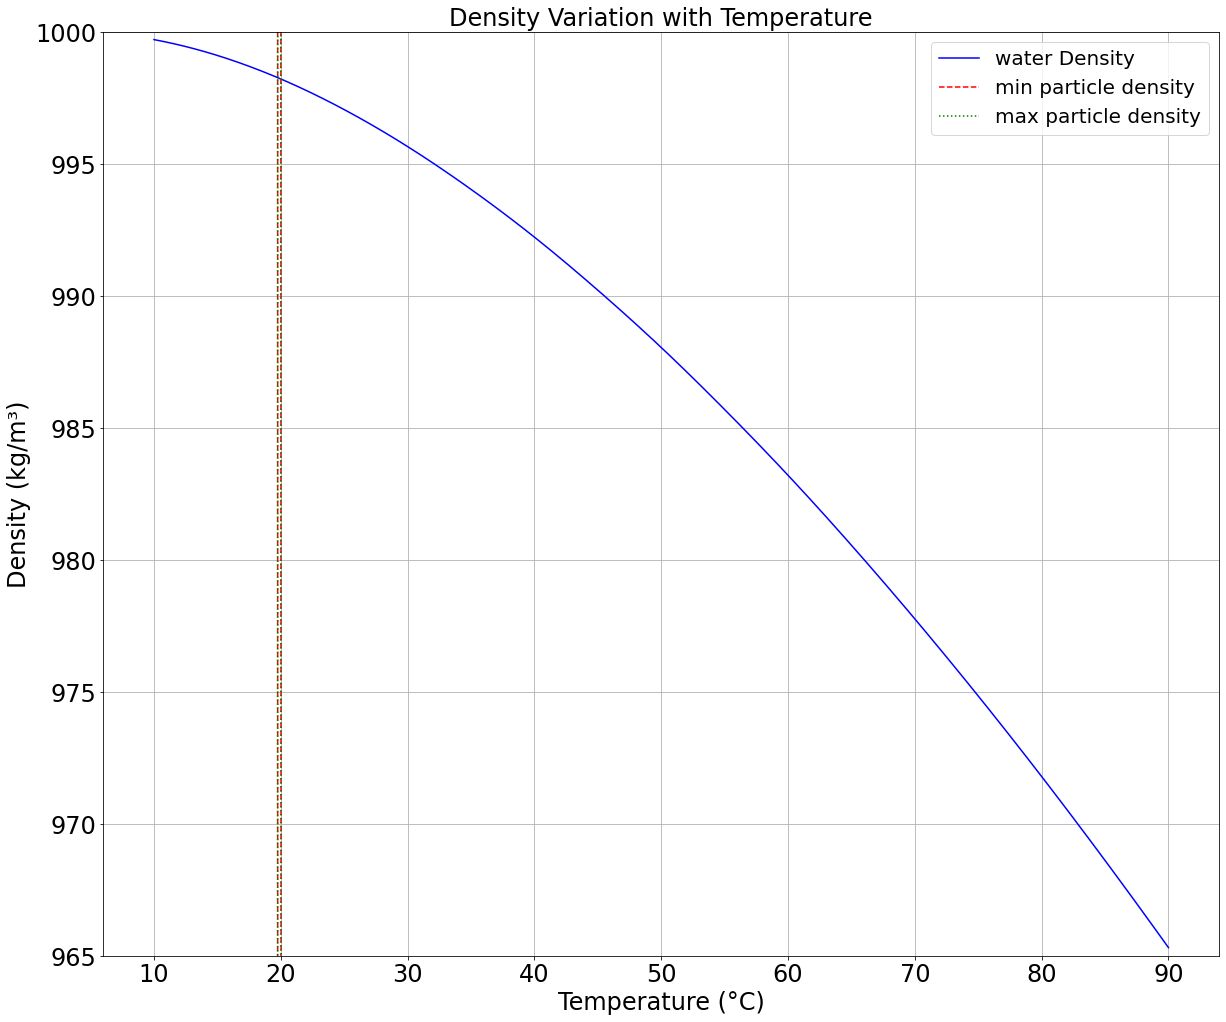

In [16]:
################################## Density Variation with Temperature #################################

temperature_data = np.array([10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100])
density_data = np.array([999.7, 999.1, 998.21, 997.05, 995.65, 994.03, 992.22, 990.21, 988.04, 985.69, 
                         983.2, 980.55, 977.76, 974.84, 971.79, 968.61, 965.31, 961.89, 958.35])

# Define constants for equations 2 and 3
a = 1-30e-6 
To = 20
rho_pmax = 985.374258
rho_pmin = 986.010500

# Define x values (temperature range from 10°C to 90°C)
x_values = np.linspace(10, 90, 500)

# Interpolate the density data to estimate values between given points
interpolated_density = interp1d(temperature_data, density_data, kind='cubic')

# Compute y values for equation 2 and 3
y2min_values = rho_pmin / (1 + 3 * a * (x_values - To))  # Equation 2
y2max_values = rho_pmax / (1 + 3 * a * (x_values - To))  # Equation 3

# Get the interpolated y-values from data for equation 1
y_values = interpolated_density(x_values)  # Interpolated density values

plt.figure(figsize=(20, 17))
plt.tick_params(axis='both', labelsize=24)  # Increase tick label size for both axes
plt.plot(x_values, y_values, label="water Density ", color='blue', linestyle='solid')
plt.plot(x_values, y2min_values, label= 'min particle density', color='red', linestyle='dashed')
plt.plot(x_values, y2max_values, label= 'max particle density', color='green', linestyle='dotted')
plt.title("Density Variation with Temperature", fontsize=24)
plt.xlabel("Temperature (°C)", fontsize=24)
plt.ylabel("Density (kg/m³)", fontsize=24)
plt.legend(fontsize=20)
plt.ylim([965, 1000])
plt.grid(True)
plt.show()


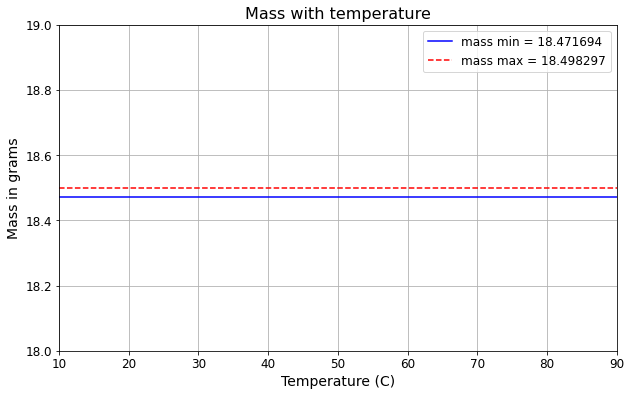

In [18]:
#################################### Mass with temperature ##############################

mmax = 18.498297
mmin = 18.471694
plt.figure(figsize=(10, 6))
plt.axhline(y=mmin, color='blue', linestyle='-', label=f'mass min = {mmin}')
plt.axhline(y=mmax, color='red', linestyle='--', label=f'mass max = {mmax}')
plt.xlabel("Temperature (C)", fontsize=14)
plt.ylabel("Mass in grams", fontsize=14)
plt.title("Mass with temperature", fontsize=16)
plt.ylim(18, 19)
plt.xlim(10, 90)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()


Radius (mm) | Mass (g)
--------------------
20           | 24.279396
30           | 55.559599
40           | 99.607232
50           | 156.422295


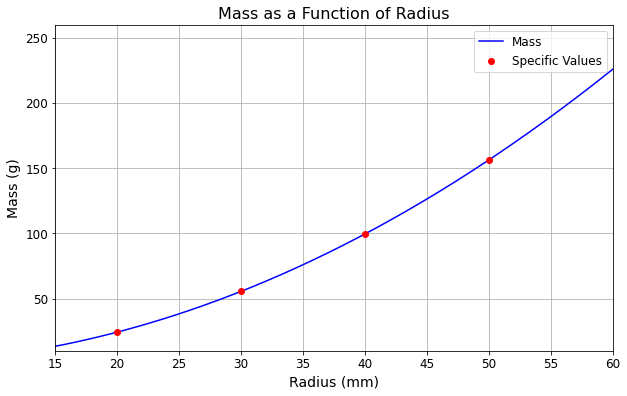

In [22]:
############################# Mass as a function of Radius #############################
rho = 5080  # kg/m^3
t = 0.001   # meters
pi = 3.141592  # Approximate value of π

def mass_equation(x):
    return rho * (4/3) * pi * (3 * t * x**2 - 3 * x * t**2 + t**3) * 1000  # Convert to grams

specific_x_values = [20, 30, 40, 50]  # mm
specific_x_values_m = np.array(specific_x_values) / 1000  # Convert mm to meters
specific_m_values = mass_equation(specific_x_values_m)

print("Radius (mm) | Mass (g)")
print("--------------------")
for x, m in zip(specific_x_values, specific_m_values):
    print(f"{x:<12} | {m:.6f}")

# Generate x values for plotting (converted to meters)
x_values = np.linspace(10, 100, 500) / 1000  # Convert mm to meters
m_values = mass_equation(x_values)  # Compute m values

plt.figure(figsize=(10, 6))
plt.plot(x_values * 1000, m_values, label='Mass', color='b')
plt.scatter(specific_x_values, specific_m_values, color='red', label='Specific Values', zorder=3)

plt.xlabel("Radius (mm)", fontsize=14)
plt.ylabel("Mass (g)", fontsize=14)
plt.title("Mass as a Function of Radius", fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)
plt.xlim([15, 60])
plt.ylim([10, 260])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

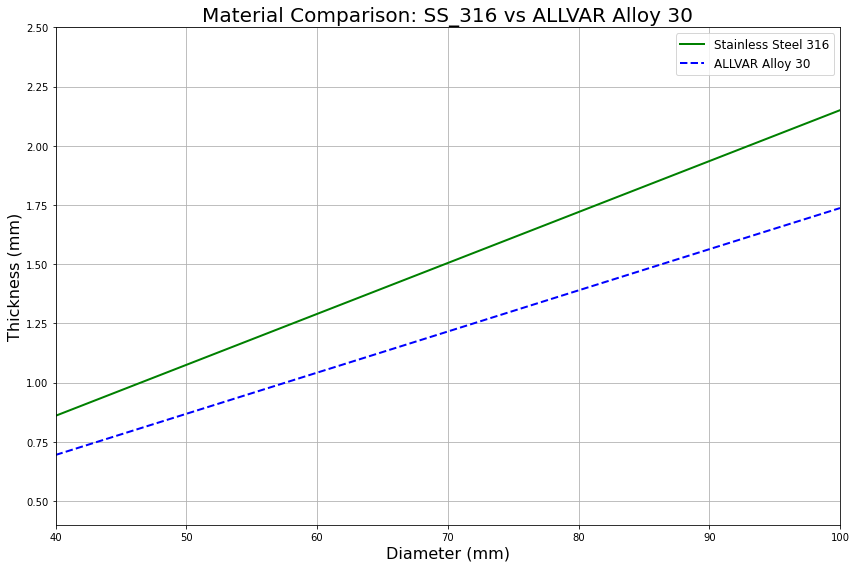

In [19]:
############################ Material Comparison: SS_316 vs ALLVAR Alloy 30 #######################
R = 8.093146  # R value for SS316 at 50°C

def cubic_equation(y, x):
    return R * y * (3 * x**2 - 3 * x * y + y**2) - x**3

def compute_y_for_x(x_values):
    y_values = []
    for x in x_values:
        roots = fsolve(cubic_equation, x0=[0.1], args=(x))
        real_roots = roots[np.isreal(roots)].real
        y_values.append(real_roots[0])
    return np.array(y_values)

x1 = np.linspace(20, 50, 100)
y1 = compute_y_for_x(x1)


# ----- Second curve: ALLVAR Alloy 30 -----
x_data = np.array([2, 4, 10, 20, 30, 40, 50, 60])
y_data = np.array([0.069489, 0.138978, 0.347445, 0.694890, 1.042335, 1.389780, 1.737225, 2.084670])

interp_func = interp1d(x_data, y_data, kind='cubic', fill_value='extrapolate')

x2 = np.linspace(20, 50, 100)
y2 = interp_func(x2)
plt.figure(figsize=(12, 8))

# Plot 1: Stainless Steel 316
plt.plot(x1 * 2, y1, label="Stainless Steel 316", color='green', linewidth=2)
# Plot 2: ALLVAR Alloy 30
plt.plot(x2 * 2, y2, label="ALLVAR Alloy 30", color='blue', linestyle='--', linewidth=2)

plt.title("Material Comparison: SS_316 vs ALLVAR Alloy 30", fontsize=20)
plt.xlabel("Diameter (mm)", fontsize=16)
plt.ylabel("Thickness (mm)", fontsize=16)
plt.ylim(0.4, 2.5)
plt.xlim(40, 100)
plt.grid(True)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()